## Observations and Insights

In [1]:
#1. there is an equal distribution of male and female mice in the sample overall
#2. ketapril and naftisol have the highest variance and standard deviation amongst the different regimens, meaning there are more outlier datapoints in their 
#2cont results and therefore the results of these drugs are less stable
#3 slope of almost 1 means that as weight increases tumor volume also increases at about the same weight for mice
#3cont on capomulin. this combined with 9.6p means we accept the null and weight and tumor volume are related.

#Slope is 0.96, y-intercept is 21.4, p-value is 9.6, correlation is 0.53 (0.96+21.4)
#correlation of 0.53 is moderate. 9.6p, accept the null they are related. 

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_table.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [3]:
#below for full overview 
#gender_counts = merge_table['Mouse ID'].count()
volume = study_results.iloc[0:,2]
print ("The mean tumor volume is {}.".format(volume.mean()))
print("The median tumor volume is {}.".format(volume.median()))
print("The variance is {}.".format(volume.var()))
print("The standard deviation is {}.".format(volume.std()))
print("The SEM is {}.".format(volume.sem()))

The mean tumor volume is 50.44838063133655.
The median tumor volume is 48.95147442.
The variance is 79.1160740071663.
The standard deviation is 8.89472169363192.
The SEM is 0.2044358503496152.


In [4]:
#generate a summary stats table of mean, median, variance, sd, and SEM of the tumor volume for each regimen
regimen_stats = merge_table.groupby(["Drug Regimen"])

mean = regimen_stats["Tumor Volume (mm3)"].mean()
median = regimen_stats["Tumor Volume (mm3)"].median()
variance = regimen_stats["Tumor Volume (mm3)"].var()
sd = regimen_stats["Tumor Volume (mm3)"].std()
sem = regimen_stats["Tumor Volume (mm3)"].sem()

regimen_overview = pd.DataFrame ({"Mean": mean,
                                "Median" : median,
                                 "Variance" : variance,
                                 "Standard Deviation" : sd,
                                 "SEM" : sem})

#regimen_overview["Mean"] = regimen_overview["Mean"].map("{:.2f}".format)
#regimen_overview["Median"] = regimen_overview["Median"].map("{:.2f}".format)
#regimen_overview["Variance"] = regimen_overview["Variance"].map("{:.2f}".format)
#regimen_overview["Standard Deviation"] = regimen_overview["Standard Deviation"].map("{:.2f}".format)
#regimen_overview["SEM"] = regimen_overview["SEM"].map("{:.2f}".format)

regimen_overview




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

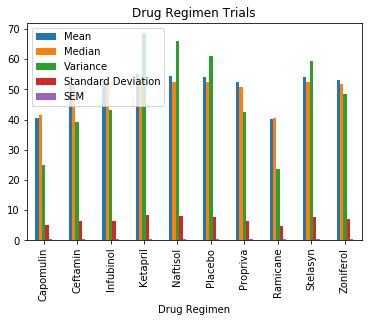

In [5]:
#Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_overview.plot.bar(title = "Drug Regimen Trials", rot=90)
#plt.ylabel("Metric")

Text(0.5, 1.0, 'Drug Regimen Trials')

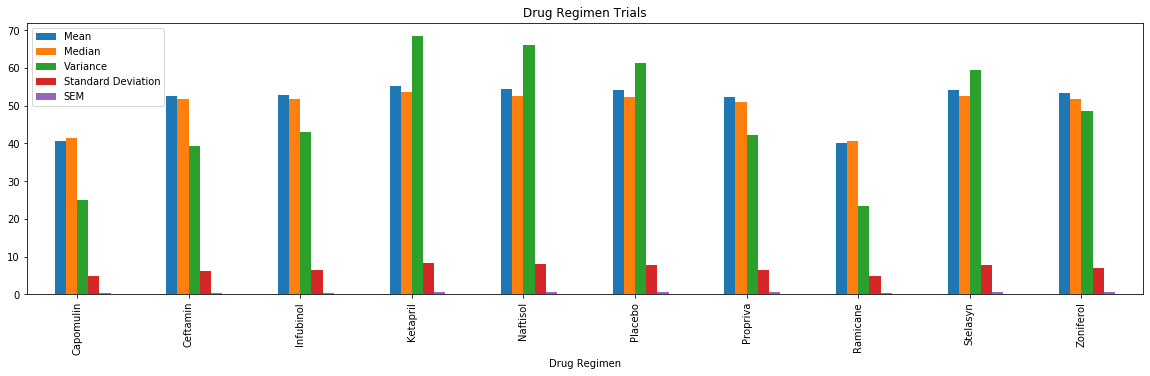

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot 1 7, 2-2 avg state rain multi

multi_plot = regimen_overview.plot(kind = "bar", figsize=(20,5), align = "edge")
multi_plot.set_xticklabels(regimen_overview)

x_axis = np.arange(len(regimen_overview))
tick_locations = [value+0.2 for value in x_axis]

#plt.figure(figsize=(20,3))
#plt.xticks(tick_locations, regimen_overview["Drug Regimen"])

plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane",
                           "Stelasyn", "Zoniferol"])
#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(regimen_tables+50)
plt.title("Drug Regimen Trials")
#plt.ylabel("Metric")
#plt.savefig("../Images/Regimen.png")
#plt.show()




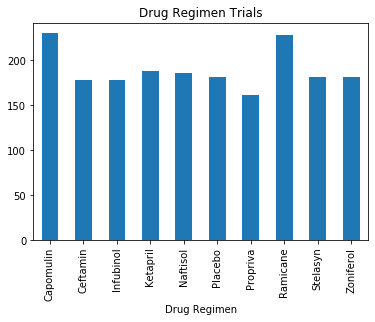

In [7]:
regimen_summ = merge_table.groupby('Drug Regimen')
regimen_tables = regimen_summ['Mouse ID'].count()
regimen_tables.plot(kind = 'bar', title="Drug Regimen Trials")
#plt.show()

Text(0, 0.5, 'Metrics')

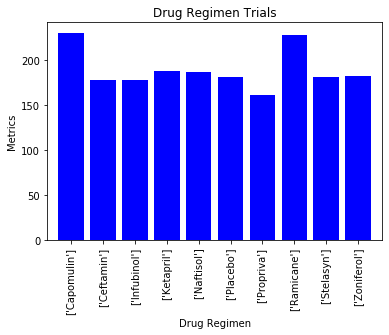

In [8]:
y_axis =regimen_summ["Mouse ID"].count()
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color='b', align="center")
labels = regimen_summ["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation = 'vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max("   ")+5000)
plt.title("Drug Regimen Trials")
plt.xlabel("Drug Regimen")
plt.ylabel("Metrics")

## Pie plots

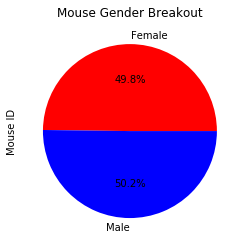

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = mouse_metadata.groupby("Sex")
gender_counts = gender_group['Mouse ID'].count()

gender_pie = gender_counts.plot(kind = "pie", y=gender_counts, title = ("Mouse Gender Breakout"), autopct='%1.1f%%', colors = ['r', 'b'])


([<matplotlib.patches.Wedge at 0x1c57fd976c8>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

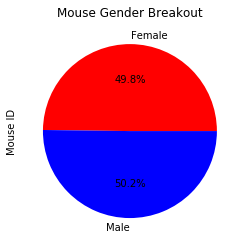

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot. 
#2/1 plot_drills
gender_group = mouse_metadata.groupby('Sex')
gender_counts = gender_group['Mouse ID'].count()
colors = {"red", "blue"}
labels = {"Female", "Male"}
plt.title("Mouse Gender Breakout")
plt.ylabel("Mouse ID")
plt.pie(gender_counts, colors=colors, labels=labels, autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 


one_treatment = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin", :]
timepoint_sort = one_treatment.sort_values("Timepoint", ascending = False)
mouse_groupby = timepoint_sort.groupby("Mouse ID")
last_treatment = mouse_groupby.first()
volume_c = last_treatment["Tumor Volume (mm3)"]

Q1 = np.percentile(volume_c, 25)
#Q1

Q3 = np.percentile(volume_c, 75)
#Q3

IQR = Q3 - Q1
#IQR

upper_boundary = Q3 + (1.5 * IQR)
#upper

lower_boundary = Q1 - (1.5 * IQR)
#lower



In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 


one_treatment = merge_table.loc[merge_table["Drug Regimen"] == "Ramicane", :]
timepoint_sort = one_treatment.sort_values("Timepoint", ascending = False)
mouse_groupby = timepoint_sort.groupby("Mouse ID")
last_treatment = mouse_groupby.first()
volume_r = last_treatment["Tumor Volume (mm3)"]

Q1 = np.percentile(volume_r, 25)
#Q1

Q3 = np.percentile(volume_r, 75)
#Q3

IQR = Q3 - Q1
#IQR

upper_boundary = Q3 + (1.5 * IQR)
#upper

lower_boundary = Q1 - (1.5 * IQR)
#lower

# Loop through the four treatments
#i cant get this right


In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

one_treatment = merge_table.loc[merge_table["Drug Regimen"] == "Infubimol", :]
timepoint_sort = one_treatment.sort_values("Timepoint", ascending = False)
mouse_groupby = timepoint_sort.groupby("Mouse ID")
last_treatment = mouse_groupby.first()
volume_i = last_treatment["Tumor Volume (mm3)"]

Q1 = np.percentile(volume_i, 25)
#Q1

Q3 = np.percentile(volum_i, 75)
#Q3

IQR = Q3 - Q1
#IQR

upper_boundary = Q3 + (1.5 * IQR)
#upper

lower_boundary = Q1 - (1.5 * IQR)
#lower



IndexError: cannot do a non-empty take from an empty axes.

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 


one_treatment = merge_table.loc[merge_table["Drug Regimen"] == "Ceftamin", :]
timepoint_sort = one_treatment.sort_values("Timepoint", ascending = False)
mouse_groupby = timepoint_sort.groupby("Mouse ID")
last_treatment = mouse_groupby.first()
volume_ce = last_treatment["Tumor Volume (mm3)"]

Q1 = np.percentile(volume_ce, 25)
#Q1

Q3 = np.percentile(volume_ce, 75)
#Q3

IQR = Q3 - Q1
#IQR

upper_boundary = Q3 + (1.5 * IQR)
#upper

lower_boundary = Q1 - (1.5 * IQR)
#lower

# Loop through the four treatments
#i cant get this right


In [22]:
tumor_volume = merge_table[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]
tumor_volume

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
0,Ramicane,k403,45.000000,0
1,Ramicane,k403,38.825898,5
2,Ramicane,k403,35.014271,10
3,Ramicane,k403,34.223992,15
4,Ramicane,k403,32.997729,20
...,...,...,...,...
1888,Naftisol,z969,63.145652,25
1889,Naftisol,z969,65.841013,30
1890,Naftisol,z969,69.176246,35
1891,Naftisol,z969,70.314904,40


In [23]:
tumor_response = tumor_volume.loc[(tumor_volume["Drug Regimen"]=='Capomulin')|
                                 (tumor_volume["Drug Regimen"] == 'Ramicane')|
                                 (tumor_volume["Drug Regimen"] == 'Infubinol')|
                                 (tumor_volume["Drug Regimen"] == 'Ceftamin')]
#tumor_response

In [24]:
tumor_response_sorted = tumor_response.sort_values('Timepoint',ascending=False)
tumor_response_sorted

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
1872,Infubinol,z581,62.754451,45
800,Infubinol,e476,62.435404,45
154,Ramicane,c758,33.397653,45
440,Capomulin,i557,47.685963,45
144,Capomulin,m957,33.329098,45
...,...,...,...,...
75,Ramicane,z578,45.000000,0
1113,Ceftamin,l490,45.000000,0
1120,Ceftamin,l558,45.000000,0
1123,Ceftamin,l661,45.000000,0


In [25]:
tumor_response_grouped = tumor_response_sorted.groupby(['Drug Regimen', 'Mouse ID'])
tumor_response_grouped.head(5)

final_tumor_volume = tumor_response_grouped.first()
final_tumor_volume

Tumor Volume (mm3)  Timepoint
Drug Regimen Mouse ID                               
Capomulin    b128               38.982878         45
             b742               38.939633         45
             f966               30.485985         20
             g288               37.074024         45
             g316               40.159220         45
...                                   ...        ...
Ramicane     s508               30.276232         45
             u196               40.667713         45
             w678               43.166373          5
             y449               44.183451         15
             z578               30.638696         45

[100 rows x 2 columns]

C:\Users\mwilliamson\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

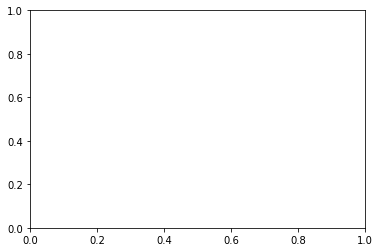

In [26]:
fig, ax = plt.subplots()
blue_circle = dict(markerfacecolor='b', marker='o')
ax.boxplot(volume_c, volume_r, volume_i,volume_ce,flierprops=blue_circle)
ax.set_title(' Final Volume Four Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and scatter plots

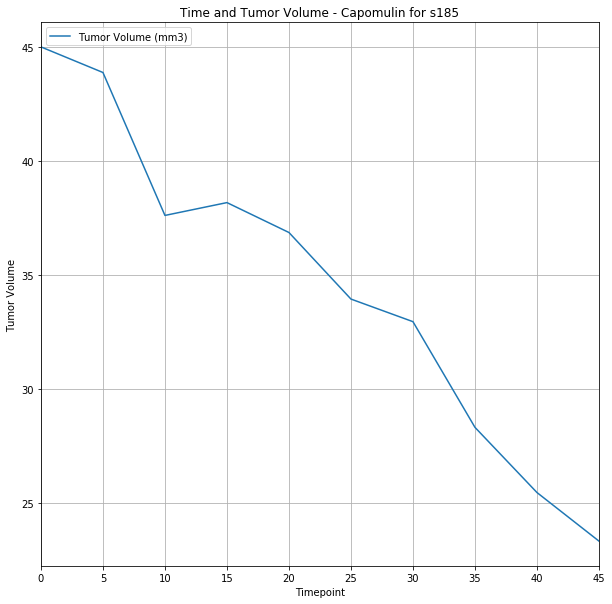

In [15]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin
#bike trippin under 5 -2- 5, maybe unemployed too 5 2 7

capomulin = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin", :]

#capomulin = merge_table.loc[merge_table["Mouse ID"] == "s185", :]
capomulin_and_mouse = capomulin.loc[capomulin["Mouse ID"] == "s185"]

#capomulin = merge_table.loc[merge_table["Mouse ID"] == "s185", ["Drug Regimen" == "Capomulin"]]
#this_sucks why doesn't this combo work

#mouse_timepoint = mouse_tumor_sums.keys()
#mouse_timepoint

capomulin_and_mouse.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(10,10), 
              title="Time and Tumor Volume - Capomulin for s185")
plt.ylabel("Tumor Volume")
plt.legend(loc='upper left')

#plt.show()
#plt.axis("equal")



Text(0, 0.5, 'Tumor Volume')

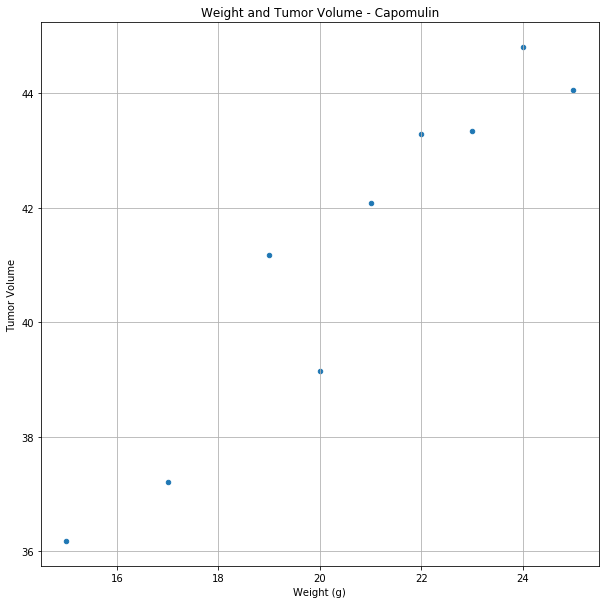

In [16]:
capomulin = merge_table[(merge_table["Drug Regimen"] == "Capomulin")]
capomulin = capomulin[["Weight (g)", "Tumor Volume (mm3)"]]
capomulin = capomulin.groupby("Weight (g)").mean()
capomulin = capomulin.reset_index()
#capomulin
capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(10,10),
               title="Weight and Tumor Volume - Capomulin")

plt.ylabel('Tumor Volume')

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 
weight = capomulin['Weight (g)']
tumor = capomulin['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

The correlation between weight and tumor volume is 0.95


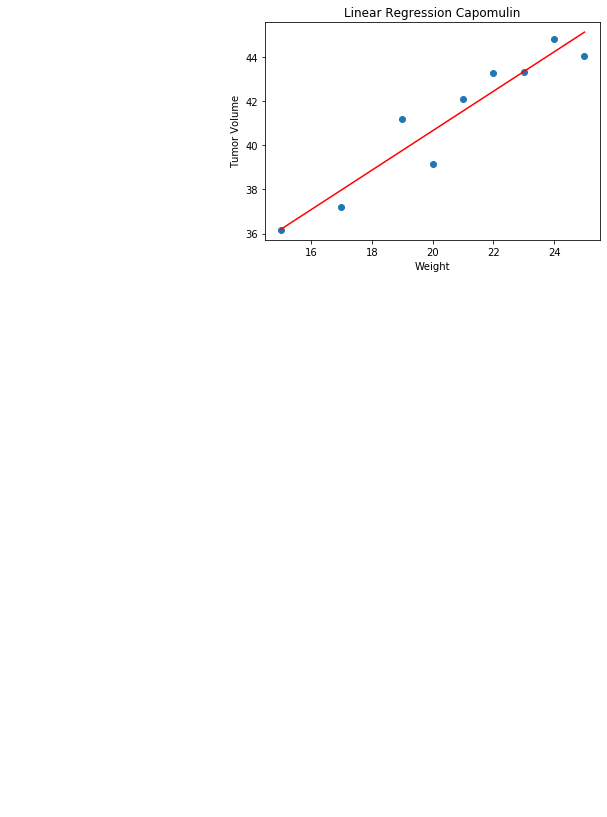

8.449451040646223e-05

In [18]:
# linear regression
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear Regression Capomulin")
plt.ylabel('Tumor Volume')
plt.xlabel('Weight')
plt.show()
#line_eq
#slope
#intercept
pvalue
#rvalue